# Работа с изображениями

In [18]:
# pip install pillow
from PIL import Image
import numpy as np

In [2]:
# загрузка изображения
filename = "1.jpg"
with Image.open(filename) as img:
    img.load()

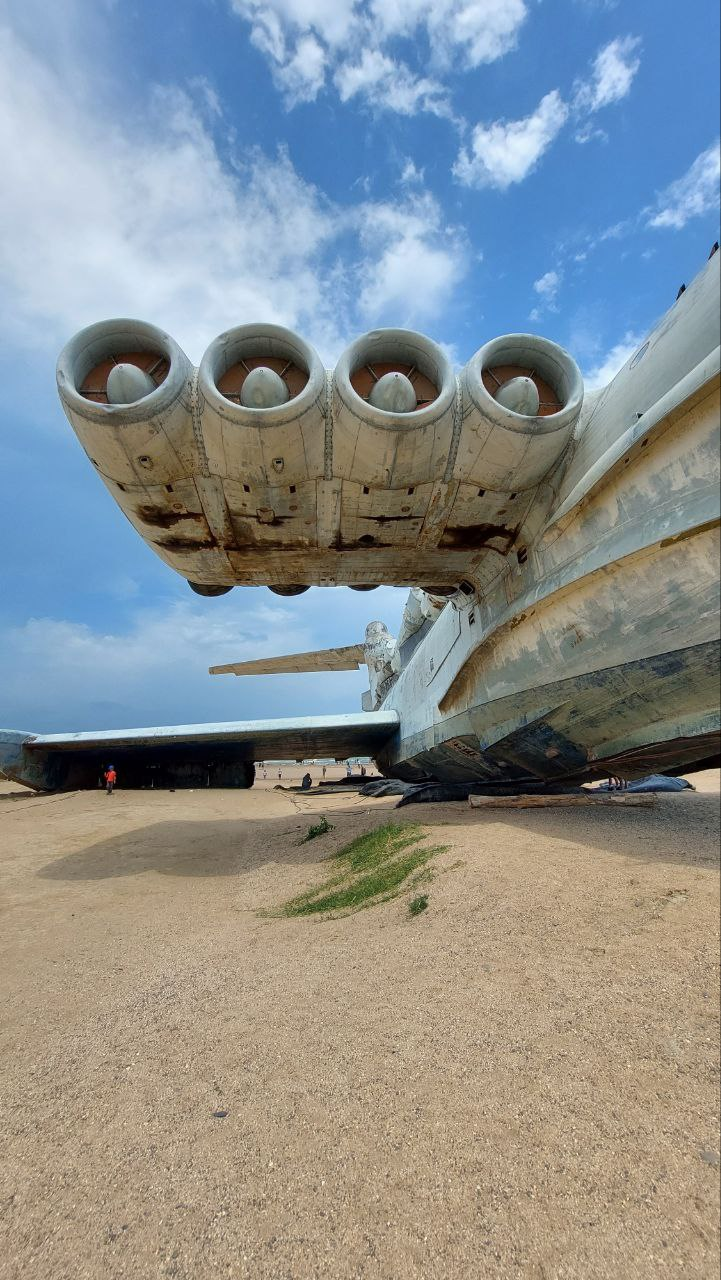

In [50]:
img

In [51]:
img.show()

In [52]:
img.format  # формат сжатия

'JPEG'

In [53]:
img.size  # размер изображения

(721, 1280)

In [54]:
img.mode  # кодировка red, green, blue

'RGB'

In [11]:
# small_img = img.reduce(4)

In [ ]:
# преобразуем объект изображения в трехмерных массив: количество строк, количество колонок и глубина цвета
img_array = np.asarray(img)

In [21]:
img_array

array([[[156, 181, 212],
        [155, 180, 211],
        [155, 180, 211],
        ...,
        [ 82, 136, 206],
        [ 86, 136, 199],
        [ 48,  88, 140]],

       [[156, 181, 212],
        [155, 180, 211],
        [155, 180, 211],
        ...,
        [ 83, 137, 207],
        [ 87, 137, 200],
        [ 48,  88, 140]],

       [[155, 180, 211],
        [155, 180, 211],
        [155, 180, 211],
        ...,
        [ 83, 137, 207],
        [ 87, 137, 200],
        [ 48,  88, 140]],

       ...,

       [[188, 166, 143],
        [169, 147, 124],
        [164, 142, 119],
        ...,
        [186, 165, 136],
        [195, 175, 148],
        [121, 106,  85]],

       [[176, 154, 131],
        [163, 141, 118],
        [164, 142, 119],
        ...,
        [186, 165, 136],
        [187, 167, 140],
        [114,  99,  78]],

       [[153, 131, 108],
        [161, 139, 116],
        [167, 145, 122],
        ...,
        [188, 167, 138],
        [185, 165, 138],
        [119, 104,  83]]

In [22]:
img_array.shape

(1280, 721, 3)

In [23]:
# преобразование из трехмерного массива в объект изображения
img_new = Image.fromarray(img_array)

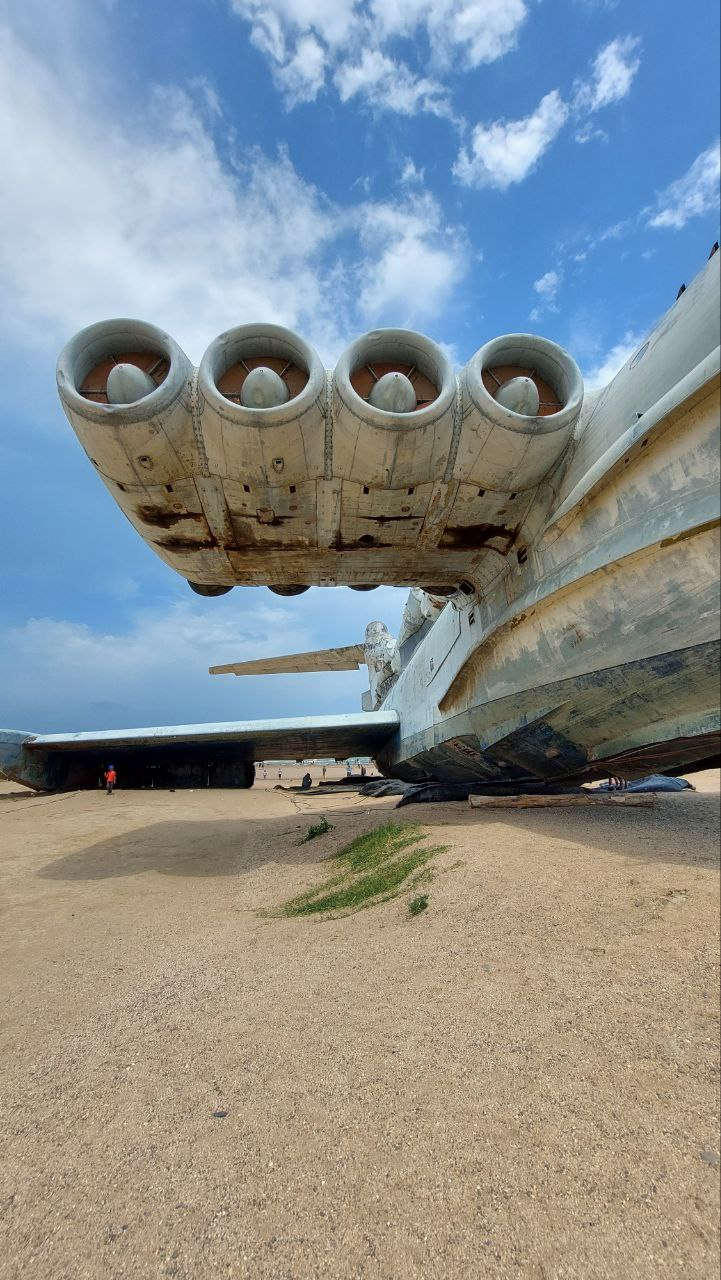

In [56]:
img_new

In [57]:
img_array[1, 2]  # если выбрать пиксель через задание строки и колонки то вернется трехмерный массив глубины

array([155, 180, 211], dtype=uint8)

In [58]:
img_array.shape

(1280, 721, 3)

In [47]:
# для того чтобы сделать изображение серым нужно заменить значения r,g,b на среднее
# от них (mean((r,g,b)), mean((r,g,b)), mean((r,g,b)))

# создаем трехмерный numpy массив с типом данных беззнаковое целое в 8 бит
n_a = np.zeros(img_array.shape, dtype=np.uint8)
# идем по строкам
for irow in range(img_array.shape[0]):
    # идем по столбцам
    for icol in range(img_array.shape[1]):
        # берем среднее от трех значений
        r = np.mean(img_array[irow, icol])
        # в новый массив записываем среднее в каждый канал цвета
        n_a[irow, icol] = (r,r,r)

In [48]:
img_new2 = Image.fromarray(n_a)

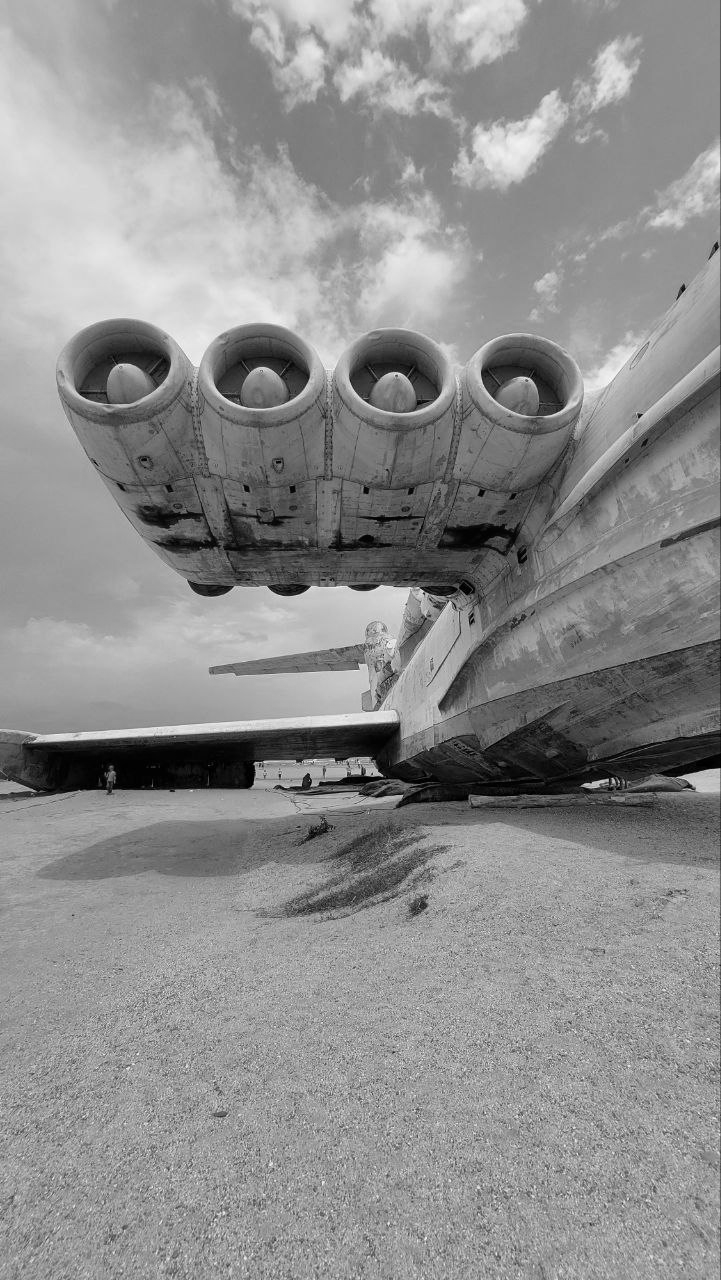

In [49]:
img_new2

# Поверхностное и глубокое копирование

копирование неизменяемых элементов это создание новых элементов

In [59]:
s = "abc"
k = s
s.replace("b", "k")


'akc'

In [60]:
k

'abc'

In [61]:
s

'abc'

копирование изменяемых элементов это копирование ссылки на объект

In [84]:
a = [1,2,[5,6,7]]
b = a

In [85]:
a[2][0] = 0
a[0] = 0

In [86]:
a

[0, 2, [0, 6, 7]]

In [87]:
b

[0, 2, [0, 6, 7]]

In [88]:
a is b

True

In [90]:
id(a) == id(b)

True

использование функции copy из модуля copy  
позволяет копировать элементы  
но только поверхностно: вложенные элементы не пересоздаются на них копируюется ссылка.

In [2]:
from copy import copy

In [3]:
a = [1,2,[5,6,7]]
b = copy(a)

In [4]:
a[2][0] = 0
a[0] = 0

In [6]:
a

[0, 2, [0, 6, 7]]

In [7]:
b

[1, 2, [0, 6, 7]]

для полного копирования можно использовать функцию deepcopy модуля copy

In [8]:
from copy import deepcopy

In [9]:
a = [1,2,[5,6,7]]
b = deepcopy(a)

In [10]:
a[2][0] = 0
a[0] = 0

In [11]:
a

[0, 2, [0, 6, 7]]

In [12]:
b

[1, 2, [5, 6, 7]]